### Machine Learning-based Data Analysis
#### Minseo Park

### [Practice 3] : UnSupervised Learning

    0. Problem Define
    1. Library import
    2. Data upload
    3. EDA(Exploratory Data Analysis) : 데이터 탐색
    4. 데이터 전처리
        - 4.1  Feature selection for the model
    5. 모델링 :: K-Means Algorithm
        - 5.1 Building the Model: finding out optimal k 
        - 5.2 Visualizating the ELBOW method to get the optimal value of K
        - 5.3 Building K-Means ALgorithm
        - 5.4 Visualizing all the clusters 

#### [0]: Problem Define

쇼핑몰 고객 그룹핑
- Data: Kaggle (https://www.kaggle.com/vjchoudhary7/customer-segmentation-tutorial-in-python)

#### 1. Libraries setteting : import libraries 

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt # visualization
import seaborn as sns #visualization
from sklearn.cluster import KMeans

#### 2. Data Upload

In [7]:
#import the dataset
dataset = pd.read_csv('./data/Mall_Customers.csv')

In [8]:
dataset.head(5) #Print first 10 rows of the dataset.

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [9]:
#total rows and colums in the dataset
dataset.shape

(200, 5)

#### 3. 데이터 탐색(EDA: Exploratory Data Analysis) : 요약 통계량 확인하기 ####
- pandas 로 불러온 데이터 살펴보기: head(), shape(), info(), describe(), value_counts(), unique() 등 
- https://hogni.tistory.com/5

In [10]:
dataset.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [11]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [12]:
dataset.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

#### 4. 데이터 전처리 ####

#### 4.1 Feature selection for the model : "특성/속성/컬럼/x/독립변수/설명변수"선정하기
1. 여기서는 2개의 변수만을 사용합니다.:Annual income and Spending Score
2. 라벨링/정답지가 없습니다.

In [13]:
dataset.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


##### ---------------------------------------------------------------------------------------------------

#### (참고 1) 특정 행과 열을 선택해서 살펴보기
- loc
1. 데이터프레임의 행이나 컬럼에 label이나 boolean array로 접근.
2. location의 약어로, 인간이 읽을 수 있는 label 값으로 데이터에 접근하는 것이다. 

- iloc
1. 데이터프레임의 행이나 컬럼에 인덱스 값으로 접근.
2. integer location의 약어로, 컴퓨터가 읽을 수 있는 indexing 값으로 데이터에 접근하는 것이다.

#### (참고 1) 예제 

In [14]:
df = pd.DataFrame({ 
    "bid_id": [1, 2, 3], 
    "bidder_id": ["Gadi", "Conda", "Lion"], 
    "city": ["Seoul", "LA", "Sydney"], 
    "item": ["TV", "jewelry", "book"]}).set_index("bid_id") 
df

,bidder_id,city,item
bid_id,,,
1,Gadi,Seoul,TV
2,Conda,LA,jewelry
3,Lion,Sydney,book


In [15]:
df.iloc[0] # 첫번째 행

bidder_id     Gadi
city         Seoul
item            TV
Name: 1, dtype: object

In [18]:
df.iloc[1] # 두번째 행

bidder_id      Conda
city              LA
item         jewelry
Name: 2, dtype: object

In [19]:
df.iloc[:,0] # 첫번째 열

bid_id
1     Gadi
2    Conda
3     Lion
Name: bidder_id, dtype: object

In [20]:
df.iloc[:,1] # 두번째 열

bid_id
1     Seoul
2        LA
3    Sydney
Name: city, dtype: object

In [22]:
df.loc[:, "city"] # 레이블이 city인 열

bid_id
1     Seoul
2        LA
3    Sydney
Name: city, dtype: object

##### ---------------------------------------------------------------------------------------------------

In [25]:
dataset.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [28]:
X = dataset.iloc[:, [3,4]].values
# Annualincome and Spending Score (4번째, 5번째 열)

In [29]:
XX = dataset.loc[:, ["Annual Income (k$)", "Spending Score (1-100)"]]

In [30]:
X
# data checking

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [31]:
XX

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


##### ------------------------------------------------------------------------------------

    0. Problem Define
    1. Library import
    2. Data upload
    3. EDA(Exploratory Data Analysis) : 데이터 탐색
    4. 데이터 전처리
        - 4.1  Feature selection for the model
    5. 모델링 :: K-Means Algorithm
        - 5.1 Building the Model: finding out optimal k 
        - 5.2 Visualizating the ELBOW method to get the optimal value of K
        - 5.3 Building K-Means ALgorithm
        - 5.4 Visualizing all the clusters 

##### ------------------------------------------------------------------------------------

#### 5. 모델링 : K-Means Algorithm ####

#### 5.1 Building the Model : k 값을 정합니다. 

1. k-means 알고리즘 최적의 k 값을 구해서 clustering 하는 것입니다. 최적의 k 값을 찾기위한 방법으로 팔꿈치(elbow) 법칙?? 을 사용합니다. 
2. elbow method 란 cluster 간의 거리의 합이 급격히 떨어지는 구간이 생기게 됩니다. 그때 k 값을 군집의 개수로 사용합니다. 
3. 참고 사이트:  https://steadiness-193.tistory.com/285

In [34]:
from sklearn.cluster import KMeans
WCSS=[]

### Within-Cluster-Sum-of-Squares (WCSS)
### https://analyticsindiamag.com/beginners-guide-to-k-means-clustering/
### 설명과 애니매이션으로 clustering에 대해서 잘 설명 되어 있습니다. 
### 그림만 따라가도.. 아하!! 하고 이해가 되실 것 같습니다. 

In [35]:
WCSS

[]

In [36]:
for i in range (1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=0)
    kmeans.fit(X)
    interia=kmeans.inertia_
    #### inertia_ is the formula used to segregate the data points into clusters
    #### inertia = 관성
    #### Cluster 간의 거리의 합을 나타내는 inertia가 급격히 떨어지는 구간이 생기는데 
    #### 이 지점의 K 값을 군집의 개수로 사용 inertia_속성으로 확인할 수 있다 
    print('k:', i, 'inertia:', interia)
    WCSS.append(kmeans.inertia_)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


k: 1 inertia: 269981.28


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


k: 2 inertia: 181363.59595959596


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


k: 3 inertia: 106348.37306211119


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


k: 4 inertia: 73679.78903948834


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


k: 5 inertia: 44448.45544793371


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


k: 6 inertia: 37265.86520484346


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


k: 7 inertia: 30259.65720728547


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


k: 8 inertia: 25050.832307547527


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


k: 9 inertia: 21862.09267218289


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


k: 10 inertia: 19657.783608703958


In [24]:
### numpy version should be downgraded 1.21.4 
### https://www.datasciencelearner.com/how-to-downgrade-numpy-steps/
### or 
### https://mydevjourney.tistory.com/76
### !pip install threadpoolctl==3.1.0

###### ------------------------------------------------------------------------------------

##### 참고 1) 변수 설명 
- n_clusters:  k-means의 k를 의미하는 군집형성의 개수를 뜻합니다.
- random_state를 통해서 난수 고정을하는 것을 의미합니다. 학습결과의 동일성을 위해서입니다.
- 참고사이트 및 sklearn 에서 KMeans clustering site: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
    - init{‘k-means++’, ‘random’}, 
        - ‘k-means++’ : selects initial cluster centers for k-mean clustering in a smart way to speed up convergence. 
        - 'random': choose n_clusters observations (rows) at random from data for the initial centroids.
        - default는 'k-means++' 입니다.

##### ------------------------------------------------------------------------------------

    0. Problem Define
    1. Library import
    2. Data upload
    3. EDA(Exploratory Data Analysis) : 데이터 탐색
    4. 데이터 전처리
        - 4.1  Feature selection for the model
    5. 모델링 :: K-Means Algorithm
        - 5.1 Building the Model: finding out optimal k 
        - 5.2 Visualizating the ELBOW method to get the optimal value of K
        - 5.3 Building K-Means ALgorithm
        - 5.4 Visualizing all the clusters 

##### ------------------------------------------------------------------------------------

#### 5.2  Visualizating the ELBOW method to get the optimal value of K
1. 최적의 k 값을 찾기위한 방법으로 팔꿈치(elbow) 법칙?? 을 사용합니다. 
2. elbow method 란 cluster 간의 거리의 합이 급격히 떨어지는 구간이 생기게 됩니다. 그때 k 값을 군집의 개수로 사용합니다. 

In [25]:
### 가정 ###

### The max number of cluster would be 10.

### for i in range(1,11):
###    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=0)
###    kmeans.fit(X)
###    WCSS.append(kmeans.inertia_)

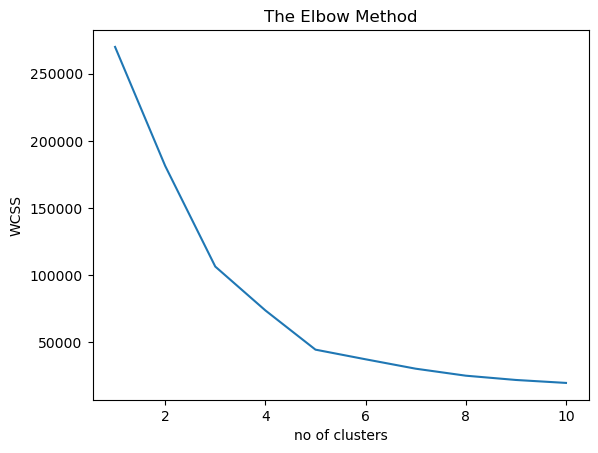

In [37]:
plt.plot(range(1,11), WCSS)

plt.title('The Elbow Method')
plt.xlabel('no of clusters')
plt.ylabel('WCSS')
plt.show()

##### 해석 ) 
- If you zoom out this curve then you will see that last elbow comes at k=5
- no matter what range we select 
    - ex) (1,21) also i will see the same behavior but if we chose higher range it is little difficult to visualize the ELBOW
- Finally, we got that k=5

##### ------------------------------------------------------------------------------------

    0. Problem Define
    1. Library import
    2. Data upload
    3. EDA(Exploratory Data Analysis) : 데이터 탐색
    4. 데이터 전처리
        - 4.1  Feature selection for the model
    5. 모델링 :: K-Means Algorithm
        - 5.1 Building the Model: finding out optimal k 
        - 5.2 Visualizating the ELBOW method to get the optimal value of K
        - 5.3 Building K-Means ALgorithm
        - 5.4 Visualizing all the clusters 

##### ------------------------------------------------------------------------------------

#### 5.3 Building K-Means ALgorithm

In [39]:
kmeansmodel = KMeans(n_clusters= 5, init='k-means++', max_iter=300, random_state=0)
y_kmeans= kmeansmodel.fit_predict(X)
y_kmeans

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 0,
       3, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 0, 1, 2, 1, 2, 1,
       0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1])

In [40]:
X[0:3,]

array([[15, 39],
       [15, 81],
       [16,  6]], dtype=int64)

In [41]:
dataset.head(3)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6


In [42]:
XX.head(3)

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6


##### 해석)
- For unsupervised learning we use "fit_predict()" wherein for supervised learning we use "fit_tranform()"
- y_kmeans is the final model.
    - income: 15, score: 39 는 그룹 4에 속한다. 
    - X = dataset.iloc[:, [3,4]].values ---->  Annualincome and Spending Score

##### ------------------------------------------------------------------------------------

    0. Problem Define
    1. Library import
    2. Data upload
    3. EDA(Exploratory Data Analysis) : 데이터 탐색
    4. 데이터 전처리
        - 4.1  Feature selection for the model
    5. 모델링 :: K-Means Algorithm
        - 5.1 Building the Model: finding out optimal k 
        - 5.2 Visualizating the ELBOW method to get the optimal value of K
        - 5.3 Building K-Means ALgorithm
        - 5.4 Visualizing all the clusters 

##### ------------------------------------------------------------------------------------

#### 5.4 Visualizing all the clusters 

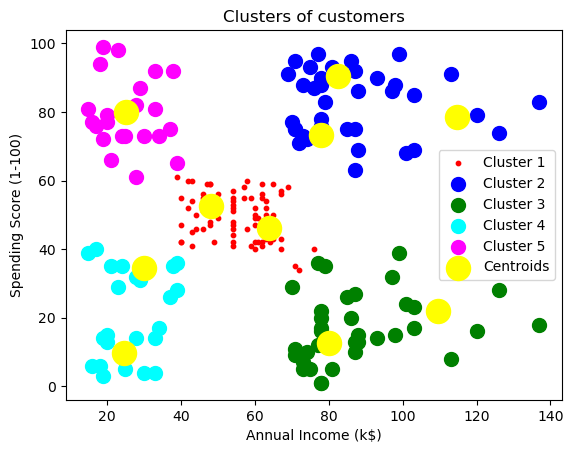

In [43]:
### 참고 사이트:  https://m.blog.naver.com/PostView.naver?isHttpsRedirect=true&blogId=tt2t2am1118&logNo=221183481798

plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 10, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')

plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [52]:
y_kmeans

array([3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 0,
       3, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 0, 1, 2, 1, 2, 1,
       0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1])

In [53]:
X[y_kmeans == 0, 0] ## Annual Income (k$)

array([39, 40, 40, 40, 40, 42, 42, 43, 43, 43, 43, 44, 44, 46, 46, 46, 46,
       47, 47, 48, 48, 48, 48, 48, 48, 49, 49, 50, 50, 54, 54, 54, 54, 54,
       54, 54, 54, 54, 54, 54, 54, 57, 57, 58, 58, 59, 59, 60, 60, 60, 60,
       60, 60, 61, 61, 62, 62, 62, 62, 62, 62, 63, 63, 63, 63, 63, 63, 64,
       64, 65, 65, 65, 65, 67, 67, 67, 67, 69, 71, 72, 76], dtype=int64)

In [54]:
X[y_kmeans == 4, 0] ## Annual Income (k$)

array([15, 16, 17, 18, 19, 19, 20, 20, 21, 23, 24, 25, 28, 28, 29, 30, 33,
       33, 34, 37, 38, 39], dtype=int64)

In [55]:
XX.head(3)

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6


In [56]:
X[y_kmeans == 4, 1] ##Spending Score (1-100)

array([81, 77, 76, 94, 72, 99, 77, 79, 66, 98, 73, 73, 82, 61, 87, 73, 92,
       81, 73, 75, 92, 65], dtype=int64)

In [61]:
X[y_kmeans == 0, 1] ##Spending Score (1-100)

array([61, 55, 47, 42, 42, 52, 60, 54, 60, 45, 41, 50, 46, 51, 46, 56, 55,
       52, 59, 51, 59, 50, 48, 59, 47, 55, 42, 49, 56, 47, 54, 53, 48, 52,
       42, 51, 55, 41, 44, 57, 46, 58, 55, 60, 46, 55, 41, 49, 40, 42, 52,
       47, 50, 42, 49, 41, 48, 59, 55, 56, 42, 50, 46, 43, 48, 52, 54, 42,
       46, 48, 50, 43, 59, 43, 57, 56, 40, 58, 35, 34, 40], dtype=int64)

In [62]:
from IPython.display import Image

Image("kmeans.png", width=600, height=400)

FileNotFoundError: No such file or directory: 'kmeans.png'

FileNotFoundError: No such file or directory: 'kmeans.png'

<IPython.core.display.Image object>

#### 모델해석하기) 
- Cluster 1 (Red Color) -> earning high but spending less
- cluster 2 (Blue Colr) -> average in terms of earning and spending 
- cluster 3 (Green Color) -> earning high and also spending high 
    - 만약 쇼핑몰에서 매출을 올리면? 이 그룹을 타켓팅해서 올려야 될 것입니다. 
    - 이 고객 그룹에게 마케팅을 해야 될 것입니다. 
    - 분석의 insight 결론이 될 것입니다.
- cluster 4 (cyan Color) -> earning less but spending more
- Cluster 5 (magenta Color) -> Earning less , spending less